# Global Plastic Waste 
## _Analyzing country plastic waste production_
### Jason Mong 

Over the past decade, global plastic waste generation has risen significantly, exceeding 353 million tonnes between 2000 and 2019. A large proportion of this waste, nearly two-thirds, comes from plastics with lifespans of less than five years. Of this, 40% is attributed to packaging, 12% to consumer goods, and 11% to clothing and textiles [[2](https://www.oecd.org/en/about/news/press-releases/2022/02/plastic-pollution-is-growing-relentlessly-as-waste-management-and-recycling-fall-short.html#:~:text=Global%20plastic%20waste%20generation%20more,11%25%20from%20clothing%20and%20textiles.)].

The dataset I have chosen, sourced from Kaggle [[1](https://www.kaggle.com/datasets/prajwaldongre/global-plastic-waste-2023-a-country-wise-analysis?resource=download)], provides details plastic waste trends across 165 countries in 2023. It focuses on country-specific plastic waste generation (measured in million metric tons), primary sources of waste, national recycling rates, and per capita waste production in kilograms per person. Additionally, the dataset includes a coastal waste risk assessment, highlighting the environmental hazards posed by mismanaged plastic waste near marine ecosystems.

What drew my interest to this dataset is the global plastic waste trends and disparities. For example, which countries contribute most to global plastic waste and what is the cause? How do recycling rates vary across regions and what possible interpretations can be drawn from its value? What environmental risks are associated with coastal waste mismanagement? 

<img src = "https://datatopics.worldbank.org/what-a-waste/img/v3_waste_disposal_site.jpg" alt="Waste" width="800" >

#### *Image Source: https://datatopics.worldbank.org/what-a-waste/tackling_increasing_plastic_waste.html*

## Data Collection
### _Section 1_

In [629]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [630]:
#Load data
waste = pd.read_csv("Plastic Waste Around the World.csv")
waste

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low
...,...,...,...,...,...,...
160,Marshall Islands,0.01,Consumer_Packaging,1.8,168.5,High
161,Micronesia,0.01,Consumer_Packaging,1.5,86.3,High
162,Palau,0.01,Consumer_Packaging,12.3,437.2,High
163,Tuvalu,0.01,Consumer_Packaging,1.2,833.3,High


### 1.1 Data Manipulation

In [631]:
waste = pd.DataFrame(waste)
waste.columns = waste.columns.str.replace('_',' ')
waste = waste.rename(columns={'Total Plastic Waste MT':'Total Plastic Waste (Metric Tonnes)'})
waste = waste.rename(columns={'Per Capita Waste KG':'Per Capita Waste (Kilograms)'})
waste = waste.rename(columns={'Recycling Rate': 'National Recycling Rate (%)'})

#Removing the '_' between words in the main sources column 
for i in range(len(waste)):
    waste.loc[i, 'Main Sources'] = waste.loc[i, 'Main Sources'].replace('_', ' ')

#check for missing values
print(waste.isna().sum())

#check if everything is the appropriate data type
waste.dtypes


Country                                0
Total Plastic Waste (Metric Tonnes)    0
Main Sources                           0
National Recycling Rate (%)            0
Per Capita Waste (Kilograms)           0
Coastal Waste Risk                     0
dtype: int64


Country                                 object
Total Plastic Waste (Metric Tonnes)    float64
Main Sources                            object
National Recycling Rate (%)            float64
Per Capita Waste (Kilograms)           float64
Coastal Waste Risk                      object
dtype: object

> The step above was done to make the headings for each column easier to access and type. The '_' between each word was inconvient and visually unappealing. The column 'Main Sources' had "_" between each word, similar to the headings issue. A for loop was used to iterate through the column to remove each "_". Additionally, checking for missing values and appropriate data types was done to ensure easy data manipulation.

In [632]:
#check for distinct values
check_columns = [waste.columns[2],waste.columns[5]]

for i in check_columns:
    print(f'Unique values in {i}:{waste[i].unique()}')
    print()

waste

Unique values in Main Sources:['Packaging Industrial' 'Packaging Consumer' 'Consumer Goods'
 'Packaging Electronics' 'Automotive Packaging' 'Consumer Packaging'
 'Food Packaging' 'Industrial Consumer' 'Electronics Packaging'
 'Industrial Packaging']

Unique values in Coastal Waste Risk:['High' 'Medium' 'Low' 'Very_High']



,Country,Total Plastic Waste (Metric Tonnes),Main Sources,National Recycling Rate (%),Per Capita Waste (Kilograms),Coastal Waste Risk
0,China,59.08,Packaging Industrial,29.8,41.2,High
1,United States,42.02,Packaging Consumer,32.1,127.5,Medium
2,India,26.33,Consumer Goods,11.5,19.3,High
3,Japan,7.99,Packaging Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive Packaging,56.1,75.6,Low
...,...,...,...,...,...,...
160,Marshall Islands,0.01,Consumer Packaging,1.8,168.5,High
161,Micronesia,0.01,Consumer Packaging,1.5,86.3,High
162,Palau,0.01,Consumer Packaging,12.3,437.2,High
163,Tuvalu,0.01,Consumer Packaging,1.2,833.3,High


> Above, a variable was used to hold two column values, it access the third and sixth column. The for loop iterates through each element and prints all unique values. This step was to make the data analysis easier.

## Analyses
### _Section 2_ 
#### This section will answer more specific questions that call back to the main question, "What are the key factors influencing global plastic waste generation and recycling trends across different countries?". Some subquestions in this section that will be asked are: 
>1. __Which countries contribute most to global plastic waste and what is the cause?__ 
>2. __How do recycling rates vary across regions and what possible interpretations can be drawn from its value?__ 
>3. __What environmental risks are associated with coastal waste mismanagement?__

 ChatGPT was used to create subquestions given the prompt, "What are some subquestions that can be derived from the main question with the information: Country, Total_Plastic_Waste_MT, Main_Source, Recycling_Rate, Per_Capita_Waste_KG, Coastal_Waste_Risk"


#### 2.1 Question 1: __Which countries contribute most to global plastic waste and what is the cause?__ 

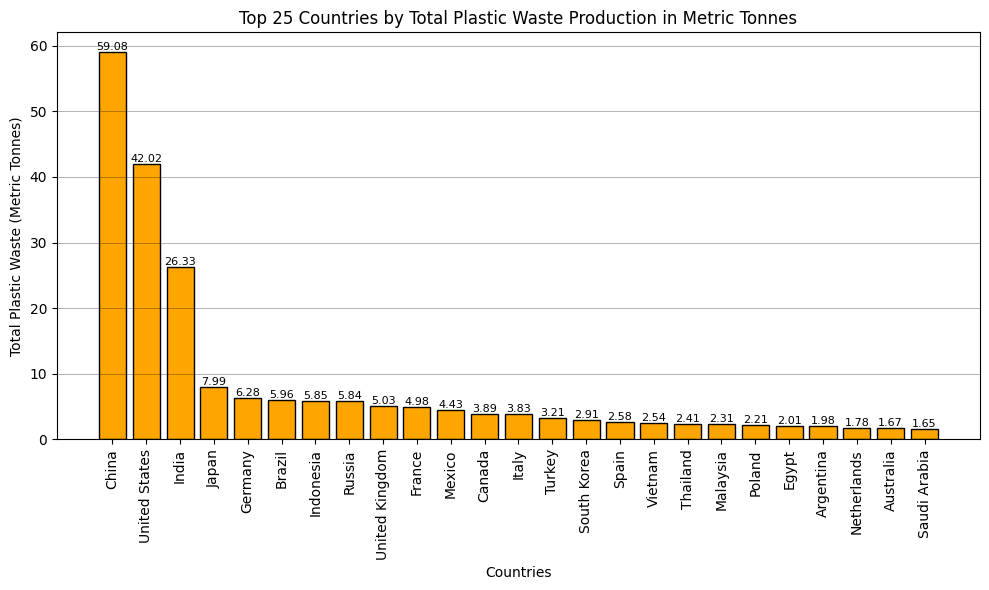

In [633]:
top_25_producers = waste.nlargest(25,'Total Plastic Waste (Metric Tonnes)')

plt.figure(figsize=(10,6))
bar_graph = plt.bar(top_25_producers['Country'],top_25_producers['Total Plastic Waste (Metric Tonnes)'], color = 'orange', edgecolor = 'black') 

#Customizing the graph
plt.xlabel('Countries')
plt.ylabel('Total Plastic Waste (Metric Tonnes)')
plt.title('Top 25 Countries by Total Plastic Waste Production in Metric Tonnes')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='-', linewidth=0.7, color = 'black', alpha = 0.3)

#print the values above each bar 
for i in bar_graph:
    value = i.get_height()
    plt.text(i.get_x() + i.get_width()/2, value, str(value), ha = 'center', va = 'bottom', fontsize = 8)

plt.tight_layout()
plt.show()


##### Figure 1 

###### The code and idea of annotating bar graphs came from StackOverFlow (https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot)

> The first step in the analysis was to identify the largest countries in total plastic waste production in 2023. As the dataset was too large to display all 165 countries, the top 25 was taken. As some countries total waste production values were almost minisucle, they were neglible to the calculations. The bar graph y-axis increases on intervals of 10, and x-axis displays the relevant countries. For easier readability, each bar was annotated along with a horizontal grid.

In [634]:
table_one = waste.loc[:24,['Country','Main Sources']]
table_one

,Country,Main Sources
0,China,Packaging Industrial
1,United States,Packaging Consumer
2,India,Consumer Goods
3,Japan,Packaging Electronics
4,Germany,Automotive Packaging
5,Brazil,Consumer Packaging
6,Indonesia,Food Packaging
7,Russia,Industrial Consumer
8,United Kingdom,Packaging Consumer
9,France,Packaging Consumer


##### Figure 2

> In correspondance to the graph and its information, for a deeper analysis, each country and its main source of plastic waste proudction was formatted into a table.

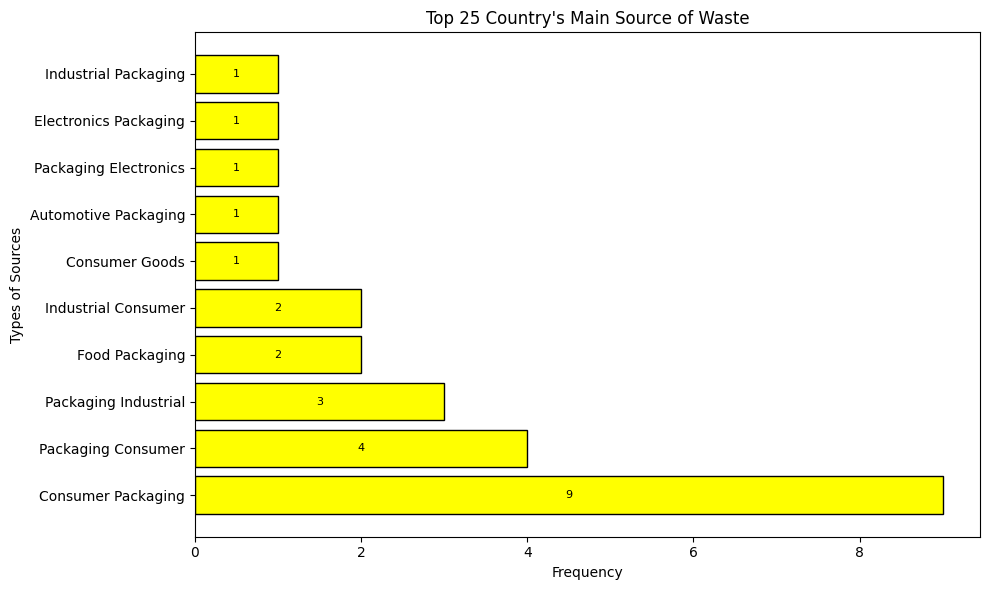

In [635]:
plt.figure(figsize=(10,6))

count_source = waste['Main Sources'].head(25).value_counts()

histo_horizontal = plt.barh(count_source.index, count_source.values, orientation= 'horizontal', color = 'yellow', edgecolor ='black')

plt.title("Top 25 Country's Main Source of Waste")
plt.xlabel("Frequency")
plt.ylabel("Types of Sources")

for i in histo_horizontal:
    value = i.get_width() 
    plt.text(i.get_x() + i.get_width() / 2, i.get_y() + i.get_height() / 2, str(value), ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()


##### Figure 3

> Here, the table was converted into a horizontal bargraph to help easier visualize the top 25 country's main source of waste production. The y-axis is the types of sources, which was clarified in section 1 and the frequency is the number of countries that fall within the catergorical divisions. Again, the graph annotated for readability.

#### 2.2 Question 2: __How do recycling rates vary across regions and what possible interpretations can be drawn from its value?__ 

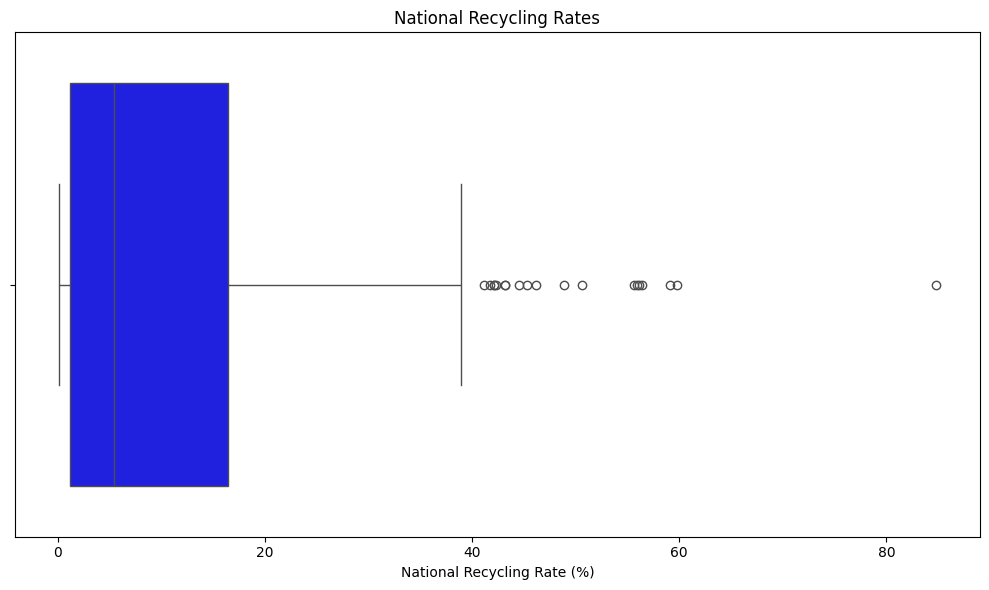

count    165.000000
mean      13.096364
std       16.687354
min        0.100000
25%        1.200000
50%        5.400000
75%       16.400000
max       84.800000
Name: National Recycling Rate (%), dtype: float64

In [636]:
plt.figure(figsize=(10,6))  
#Create a boxplot  
sns.boxplot(x = waste['National Recycling Rate (%)'], color = 'blue')

plt.xlabel('National Recycling Rate (%)')
plt.title('National Recycling Rates')

plt.tight_layout()
plt.show()

#Show where the lower and upper bounds are as well as outliers 
waste['National Recycling Rate (%)'].describe()


##### Figure 4 

> The boxplot here represents the national recycling rates. For a numeric representation, the function .describe() was used on the column 'National Recycling Rate (%)'. The boxplot highlights the extreme and mild outliers as well as the upper and lower bounds. Additionally, it produces the mean, lowest and highest value. 

In [637]:
#Group the national recycling rates and countries
recycling_rate = waste.groupby('Country')['National Recycling Rate (%)']

#Get the highest and lowest recycling rate for each country
highest_recycling_rates = recycling_rate.max()
lowest_recycling_rates = recycling_rate.min()

#Get the top 10 countries with the highest and lowest recycling rates to represent the boxplot
top_10_highest_recycling = highest_recycling_rates.nlargest(10)
top_10_lowest_recycling = lowest_recycling_rates.nsmallest(10)

print("\nTop 10 Highest Recycling Rates:")
print(top_10_highest_recycling)

print("\nTop 10 Lowest Recycling Rates:")
print(top_10_lowest_recycling)




Top 10 Highest Recycling Rates:
Country
Japan             84.8
Singapore         59.8
South Korea       59.1
Austria           56.4
Germany           56.1
Netherlands       55.9
Iceland           55.6
Sweden            50.6
Luxembourg        48.9
United Kingdom    46.2
Name: National Recycling Rate (%), dtype: float64

Top 10 Lowest Recycling Rates:
Country
Chad                        0.1
Somalia                     0.1
Central African Republic    0.2
Liberia                     0.2
Niger                       0.2
Western Sahara              0.2
Eritrea                     0.3
Guinea-Bissau               0.3
Mali                        0.3
Yemen                       0.3
Name: National Recycling Rate (%), dtype: float64


##### Figure 5

> This expands on the boxplot more by highlighting 10 high extreme and mild outliers. It also encapsulates the 10 lowest values that fall between the min and lower quartile in relation to every nation's recycling rate.

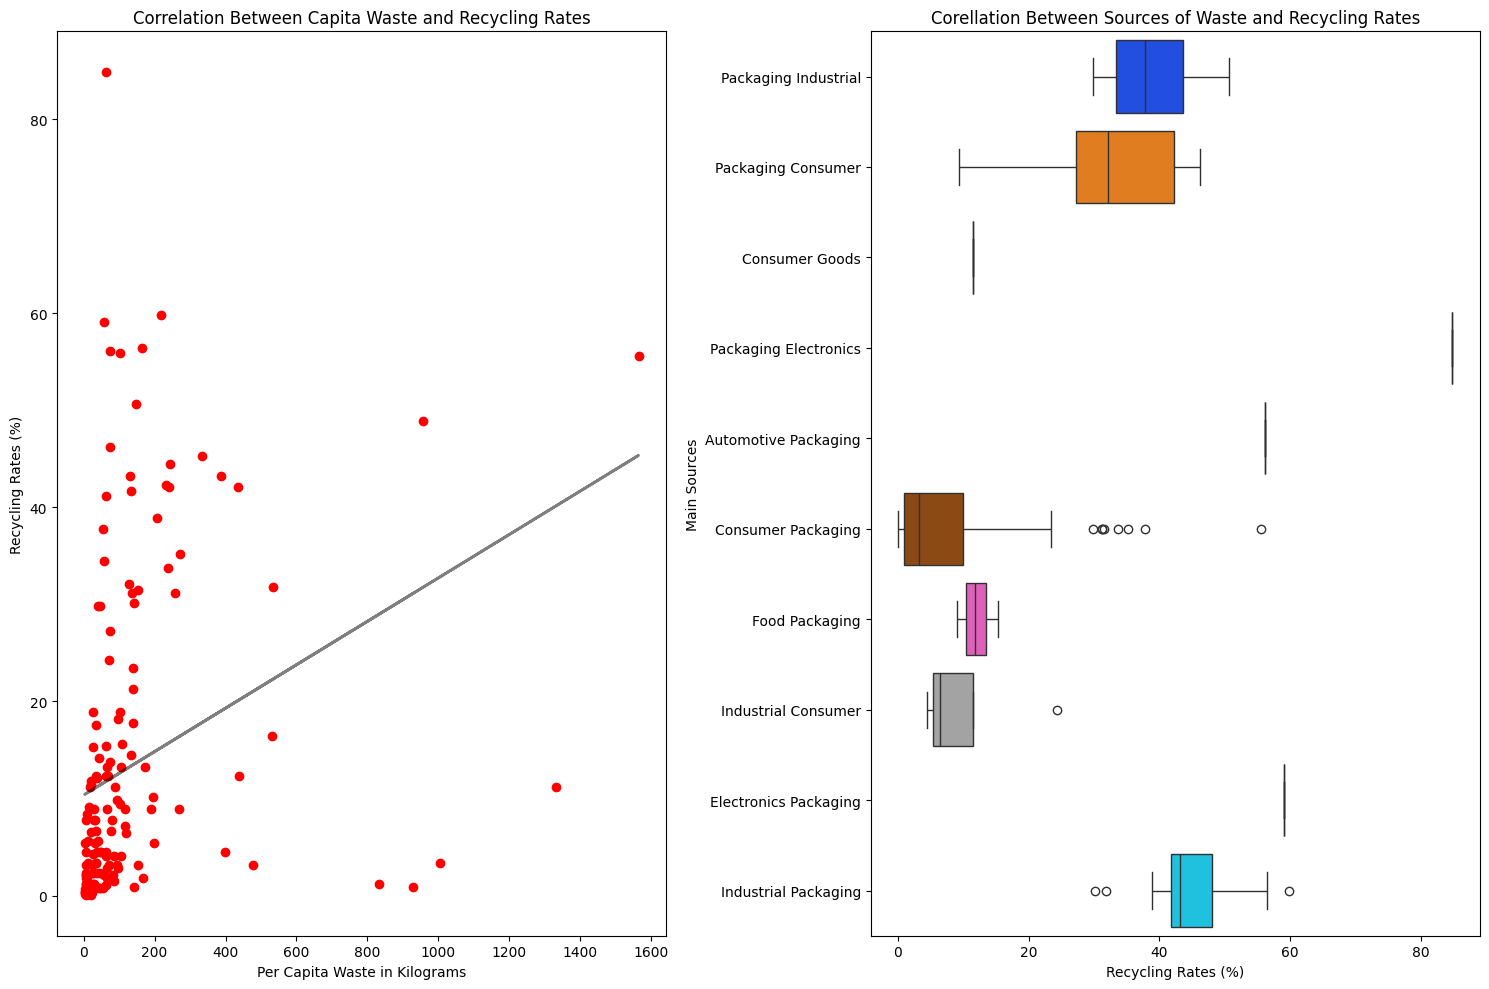

In [638]:
#Create the trendline
slope, intercept = np.polyfit(waste['Per Capita Waste (Kilograms)'], waste['National Recycling Rate (%)'], 1)
trendline = np.poly1d([slope, intercept])

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

#Create a scatterplot for the comparison 
axes[0].scatter(waste['Per Capita Waste (Kilograms)'], waste['National Recycling Rate (%)'], color='red')

axes[0].plot(waste['Per Capita Waste (Kilograms)'], trendline(waste['Per Capita Waste (Kilograms)']), color='black', linewidth=2, alpha = 0.5)

#Customize the first graph
axes[0].set_xlabel('Per Capita Waste in Kilograms')
axes[0].set_ylabel('Recycling Rates (%)')
axes[0].set_title('Correlation Between Capita Waste and Recycling Rates')

#Create a boxplot for the comparison
sns.boxplot( x = 'National Recycling Rate (%)', y = 'Main Sources', data = waste, ax = axes[1],  hue='Main Sources', palette='bright', legend=False)

#Customize the boxplot
axes[1].set_xlabel('Recycling Rates (%)')
axes[1].set_title('Corellation Between Sources of Waste and Recycling Rates')


plt.tight_layout()
plt.show()


###### A line of code was used from StackOverFlow to create the trendline (https://stackoverflow.com/questions/46627629/how-to-use-numpy-polyfit-to-plot-trend)

In [639]:
print(waste['Main Sources'].value_counts())

Main Sources
Consumer Packaging       131
Industrial Packaging      14
Packaging Consumer         5
Packaging Industrial       4
Industrial Consumer        4
Food Packaging             3
Automotive Packaging       1
Packaging Electronics      1
Consumer Goods             1
Electronics Packaging      1
Name: count, dtype: int64


##### Figure 6

> The two graphs focuses on recycling rates per capita and the main sources. For reference, it uses all 165 countries to model these graphs. The first graph is meant to indicate the percentage of how much someone recycles, on the other hand, the second graph is a boxplot meant to represent how much recycling is done per country's main source of waste production.

#### 2.3 Question 3: __What environmental risks are associated with coastal waste mismanagement?__

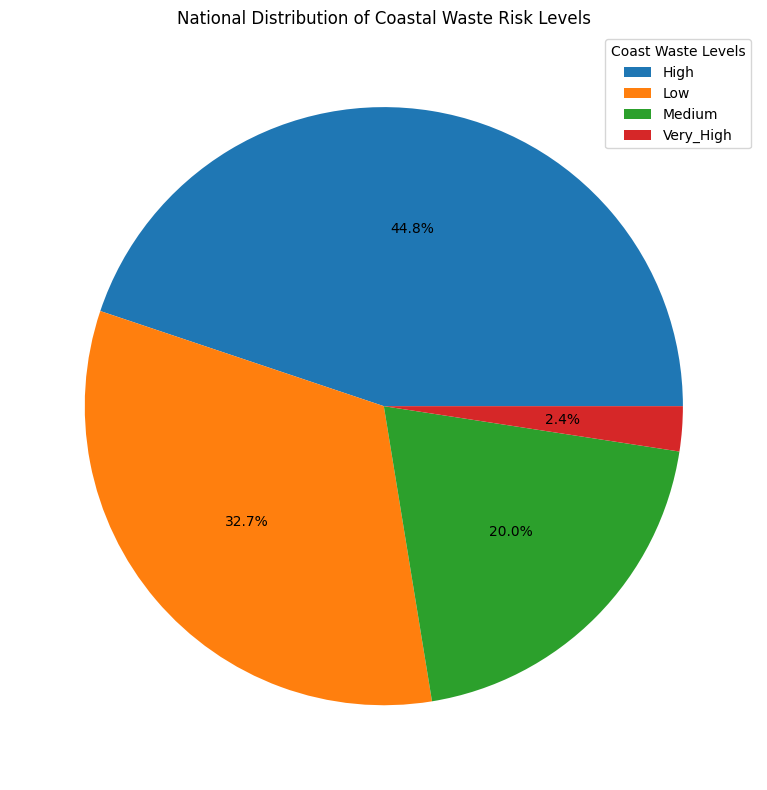

In [640]:
costal_count = waste['Coastal Waste Risk'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(costal_count, labels=None, autopct = '%1.1f%%')

plt.title("National Distribution of Coastal Waste Risk Levels")

# Show the chart
plt.tight_layout()
plt.legend(labels=costal_count.index, title = 'Coast Waste Levels')
plt.show()  

###### An understanding of making pie charts are from the site (https://www.w3schools.com/python/matplotlib_pie_charts.asp)
##### Figure 7

> This pie chart is a distribution of all countries coastal waste risk involvement. This chart aims to indicate the levels at which how much harm is being done to the sea.

In [641]:
risk_dict = {'Low': [], 'Medium': [], 'High': [], 'Very_High': []}

for i,row in waste.iterrows():
    country = row['Country']
    risk = row['Coastal Waste Risk']

    if risk == 'Low':
        risk_dict['Low'].append(country)
    elif risk =='Medium':
        risk_dict['Medium'].append(country)
    elif risk == 'High':
        risk_dict['High'].append(country)
    elif risk == 'Very_High':
        risk_dict['Very_High'].append(country)

for risk_level, countries in risk_dict.items():
    print(f"{risk_level} Risk: {countries}")

for risk_level, value in risk_dict.items():
    print(f"\nRisk Level:{risk_level}, Number of Countries: {len(value)}")

Low Risk: ['Germany', 'United Kingdom', 'France', 'Canada', 'Poland', 'Netherlands', 'Belgium', 'Sweden', 'Austria', 'Czech Republic', 'Hungary', 'Denmark', 'Finland', 'Norway', 'Ireland', 'Kazakhstan', 'Slovakia', 'Belarus', 'Lithuania', 'Slovenia', 'Bolivia', 'Paraguay', 'Latvia', 'Estonia', 'Luxembourg', 'Iceland', 'Mongolia', 'Afghanistan', 'Ethiopia', 'Uganda', 'Rwanda', 'Burundi', 'Malawi', 'Zimbabwe', 'Zambia', 'Botswana', 'Lesotho', 'Eswatini', 'Mali', 'Burkina Faso', 'Niger', 'Chad', 'Central African Republic', 'Moldova', 'North Macedonia', 'Bosnia and Herzegovina', 'Kosovo', 'Armenia', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Nepal', 'Bhutan']
Medium Risk: ['United States', 'Japan', 'Brazil', 'Russia', 'Italy', 'South Korea', 'Spain', 'Argentina', 'Australia', 'Saudi Arabia', 'South Africa', 'Colombia', 'Ukraine', 'Greece', 'Romania', 'Portugal', 'Singapore', 'Israel', 'Bulgaria', 'Azerbaijan', 'Croatia', 'Uruguay', 'Jordan', 'Cyprus', 'Montenegro', 'Malta',

> This portion stores all countries in a dictionary by risk levels. It starts off with an empty list for each key. Depending on the risk level, it is then appended to the corresponding list in the dictionary. The code also provides a summary of all the countries stored in the list and how many are in that list.

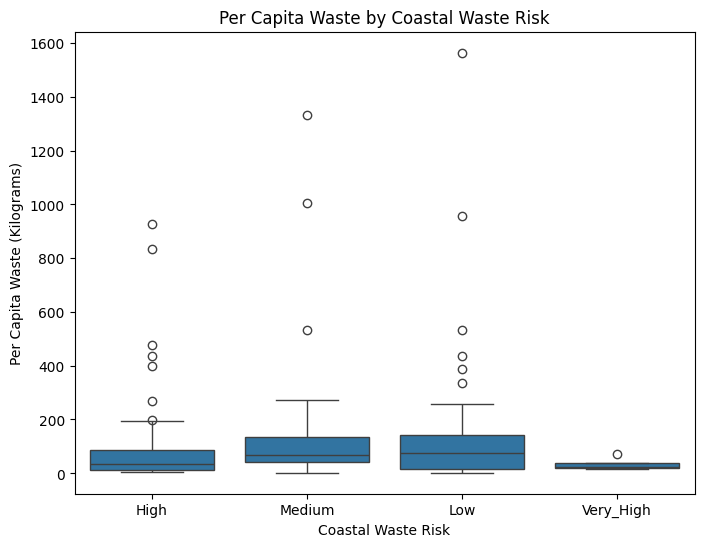

In [642]:
avg_per_capita = waste.groupby('Coastal Waste Risk')['Per Capita Waste (Kilograms)'].mean().reset_index()

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Coastal Waste Risk', y='Per Capita Waste (Kilograms)', data=waste)
plt.title('Per Capita Waste by Coastal Waste Risk')
plt.show()

##### Figure 8

> This boxplot is the relationship between capita waster and coastal waste risk. It provides a visual representation of the distribution of per capita waste for each risk level, highlighting the median, interquartile range, and any outliers. 

## Discussion
### _Section 3_

#### What are the key factors influencing global plastic waste generation different countries?"

To address the main question, three subquestions were developed, starting with identifying the key factors behind which countries contribute most to global plastic waste and the causes. Figure 1 visualizes the total plastic waste production of the top 25 countries, which is predominantly made up of first-world countries, with a few exceptions like China, India, and other Asian nations. In 2023, China produced a staggering `59.08 million tons`, while the United States produced `47.02 million tons`, and India produced `26.33 million tons`. Japan, in comparison, produced significantly less, at `7.99 million tons`, with all other countries following a decreasing trend. Figures 2 and 3 highlight the main sources of plastic waste in these countries. From these figures, an inference can be drawn that China's dominance in plastic waste production is tied to its status as a global manufacturing hub, driven by mass production and packaging for export, particularly through shopping platforms like Temu and AliExpress. This mass production, combined with waste generated from discarded products, creates a proportion where an increase of products results in the increase of waste. The United States shares a similar pattern, though its production is lower, with consumer packaging being the primary source of waste. India, on the other hand, primarily generates plastic waste from consumer goods, particularly packaging. As seen in Figure 3, consumer packaging emerges as the leading source of plastic waste for `9 of the top 25 `, consisting of plastics used for wrapping, protection, and enhancing customer experience. First-world countries, such as the United States and Japan, produce significant plastic waste from packaging used for food wrapping and other everyday consumer products.


The second subquestion explores national recycling rates and the factors influencing waste production. Figure 4 is a box plot representing the national recycling rates of all 165 countries. The numerical table indicates an average recycling rate of `13.10%`, which is concerning for the environment. The minimum value of `0.1%` suggests that some countries recycle almost nothing, often indicating a lack of waste management, typical for third-world countries. On the other hand, the maximum value of `84.80%` represents highly effective waste management, typical for first-world countries. A group of countries falls into the category of mild outliers, with recycling rates between `40% and 60%`. This is consistent with the findings in Figure 5, where the top 10 countries with the highest and lowest recycling rates are displayed. The countries with high recycling rates, including mild to extreme outliers, are primarily first-world countries, while the lowest rates are found in third-world countries.
Further analysis looks at waste production per person and its correlation with recycling rates. Ideally, higher waste production should correlate with higher recycling rates. However, the data shows no clear adherence to this trend, as many data points do not closely follow the trendline. Notably, data points near 0 on the x-axis (indicating low waste per capita) with high recycling rates indicate effective waste management systems. Conversely, countries with high waste per capita and low recycling rates are poor indicators of effective waste management. Many data points cluster in the low recycling and low waste per capita areas, suggesting that while little waste is produced, the low recycling rates imply that the waste is not properly managed and ends up elsewhere. The box plot on the right analyzes recycling rates by major sources. Consumer packaging, which shows a range of recycling rates between `30% and 60%`, has several mild outliers and an extreme outlier, indicating that `40% to 70%` of this waste is not recycled. In contrast, packaging for electronics shows a much higher recycling rate, averaging above `80%`, which reflects stricter environmental regulations for electronic waste disposal. Consumer goods, however, have an average recycling rate slightly above `10%`, showing that recycling in this category is much less effective.


The final subquestion examines how environmental factors influence waste production. Figure 7 presents coastal risk levels in a pie chart, showing that `32.7%` of countries have low risk, `20%` have medium risk, `44.8%` have high risk, and `2.4%` have very high risk. The dominance of the high-risk category is notable and aligns with earlier data, suggesting that neglect of recycling and high waste production are significant contributors to environmental risks. Of the `165 countries analyzed, 74 fall into the high-risk category`, many of which are second- and third-world countries with poor waste management systems. Figure 8 provides a box plot detailing waste production per capita by coastal risk level, further elaborating on the proportions in Figure 7. Countries in the low-risk category with outlier data points indicate that, despite their low coastal risk, they still have somewhat effective recycling systems to manage waste. However, outliers in any risk category are problematic, as they reflect inefficiencies in waste management. Ideally, all data points would fall within the box plot's interquartile range, signifying low per capita waste and effective recycling management. This visualization underscores the connection between poor waste management practices and heightened environmental risks, particularly in countries with high and very high coastal waste risk levels.



###### ChatGPT was used to refine grammar and articulation



## References 
 1. Global Plastic Waste 2023: Country-wise Data [[source](https://www.kaggle.com/datasets/prajwaldongre/global-plastic-waste-2023-a-country-wise-analysis?resource=download)]
 2. Plastic pollution is growing relentlessly as waste management and recycling fall short [[source](https://www.oecd.org/en/about/news/press-releases/2022/02/plastic-pollution-is-growing-relentlessly-as-waste-management-and-recycling-fall-short.html#:~:text=Global%20plastic%20waste%20generation%20more,11%25%20from%20clothing%20and%20textiles.)]
 3. OpenAI ChatGPT
 4. Annotating Graphs[[source](https://stackoverflow.com/questions/61718127/how-to-add-multiple-annotations-to-a-bar-plot)]
 5. Making Pie Charts [[source](https://www.w3schools.com/python/matplotlib_pie_charts.asp)]